In [80]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
#Declination of the sun, counted from Spring equinox
def sundec(day):
    return np.arcsin(np.sin(23.44/180*math.pi)*np.sin(day/365.24*2*math.pi))

def sundecdeg(day):
    return 180/math.pi*sundec(day)

#More accurate computation
def sundeq(day):
    dph = 3 #perihelion on Jan 3 (Jan 5, 2, 4, 4, 3, 4, 3, 3, 5, 2 in 2020, 2021, ...)
    w=2*math.pi/365.24
#    a=day*w+math.pi/2
    a=(day+89)*w
    b=a+2*0.0167*np.sin(w*(day+79-dph)) #solar ecliptic longitude counted from Winter solstice
    return -np.arcsin(np.sin(23.44/180*math.pi)*np.cos(b))

In [3]:
#Equation of time, counted from Spring equinox
def eqot(day):
    dph = 3 #perihelion on Jan 3 (Jan 5, 2, 4, 4, 3, 4, 3, 3, 5, 2 in 2020, 2021, ...)
    w=2*math.pi/365.24
#    a=day*w+math.pi/2
    a=(day+89)*w
    b=a+2*0.0167*np.sin(w*(day+79-dph)) #solar ecliptic longitude counted from Winter solstice
#    c=(a+np.arctan2(np.cos(b),np.cos(23.44/180*math.pi)*np.sin(b)))/math.pi+.5
    c=(a-np.arctan(np.tan(b)/np.cos(23.44/180*math.pi)))/math.pi
    return 12*(c-np.round(c))

#counting from Jan 1
def eqot1(d): #d=0 on Jan 1
    return eqot(d-79)

#counting from Jan 1
def eqot2(d): #d=0 on Jan 1
    dph = 3 #perihelion on Jan 3 (Jan 5, 2, 4, 4, 3, 4, 3, 3, 5, 2 in 2020, 2021, ...)
    w=2*math.pi/365.24
    a=(d+10)*w #counting from Winter solstice 
    b=a+2*0.0167*np.sin(w*(d+1-dph)) #solar ecliptic longitude counted from Winter solstice
    c=(a-np.arctan(np.tan(b)/np.cos(23.44/180*math.pi)))/math.pi
    return 12*(c-np.round(c))

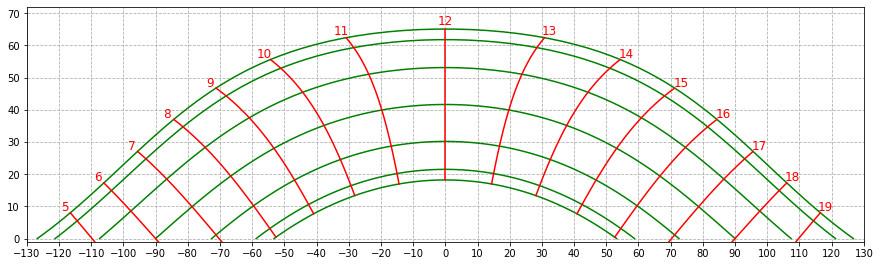

In [24]:
#Solar altitude-azimuth curve
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(day):
    d=-sundec(day)
    t=np.arccos(tna*np.tan(d))
    return t
def solalt(tt):
    d=-sundec(ddd)
    td=np.tan(d)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    d=-sundec(ddd)
    td=np.tan(d)
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)
def solaltd(day):
    d=-sundec(day)
    td=np.tan(d)
    t=h2a(ttt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solazd(day):
    d=-sundec(day)
    td=np.tan(d)
    t=h2a(ttt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)

xm = 130
ym = 72
t1=4
t2=20

#Ulaagchiin Khar Lake
lat = 48.3463
lon = 96.1212

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(15,7))
ax = fig.gca()

for i in range(-3,4):
    ddd = i*365.24/12
    sr = setrise(ddd)
    t = np.linspace(a2h(-sr), a2h(sr), 100)
    plt.plot(solaz(t),solalt(t),'g')

k=2.5
for ttt in range(5,20):
    d = np.linspace(-3*365.5/12,3*365.5/12,100)
    plt.plot(solazd(d),solaltd(d),'r')
    d = 2*365.24/12
    dx = solazd(d)
    dy = solaltd(d)
    d = 3*365.24/12
    x = solazd(d)
    y = solaltd(d)
    dx = x-dx
    dy = y-dy
    d = np.sqrt(dx*dx+dy*dy)
    dx = dx/d
    dy = dy/d
    plt.text(x+k*dx,y+k*dy, ttt, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
    
plt.margins(.01,.1)
ax.set_xlim([t1,t2])
ax.set_ylim([-1,ym])
ax.set_xticks(np.arange(-xm, xm+.1, 10))
ax.set_yticks(np.arange(0, ym+.1, 10))
plt.rcParams['grid.linestyle'] = "--"
ax.set_aspect(1)
plt.grid()
#plt.legend(loc=2)
#plt.savefig('azalt.pdf',bbox_inches='tight')
plt.show()

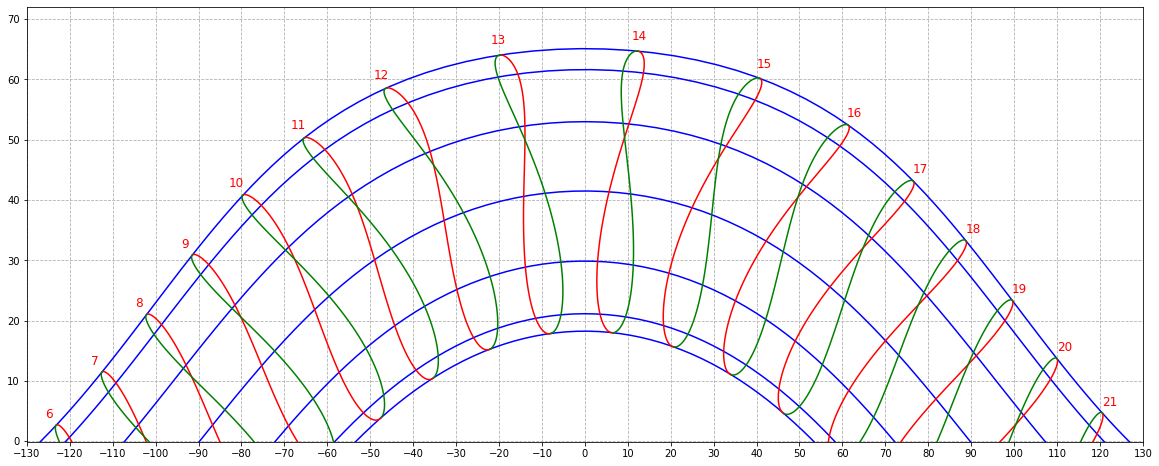

In [20]:
#Solar altitude-azimuth curve with equation of time accounted for
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(d):
    t=np.arccos(tna*np.tan(d))
    return a2h(t)
def solalt(tt):
    d=-sundeq(ddd)
    td=np.tan(d)
    t=h2a(tt+eqot(ddd)+lon/15-timezone-dst)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    d=-sundeq(ddd)
    td=np.tan(d)
    t=h2a(tt+eqot(ddd)+lon/15-timezone-dst)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)
def solaltd(day):
    d=-sundeq(day)
    td=np.tan(d)
    tt=ttt+eqot(day)+lon/15-timezone-dst
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solazd(day):
    d=-sundeq(day)
    td=np.tan(d)
    tt=ttt+eqot(day)+lon/15-timezone-dst
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)

xm = 130
ym = 72
t1=5
t2=22

#Ulaagchiin Khar Lake
lat = 48.3463
lon = 96.1212
timezone = 8
dst = 0

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(20,8))
ax = fig.gca()

t = np.linspace(t1, t2, 100)

for i in range(-3,4):
    ddd=i*365.24/12
    plt.plot(solaz(t),solalt(t),'b')

k=2.5
for ttt in range(6,22):
    d = np.linspace(-3*365.24/12,3*365.24/12,100)
    plt.plot(solazd(d),solaltd(d),'r')
    d = np.linspace(3*365.24/12,9*365.24/12,100)
    plt.plot(solazd(d),solaltd(d),'g')
    d = -3*365.24/12
    dx = solazd(d)
    dy = solaltd(d)
    d = 3*365.24/12
    x = solazd(d)
    y = solaltd(d)
    dx = x-dx
    dy = y-dy
    d = np.sqrt(dx*dx+dy*dy)
    dx = dx/d
    dy = dy/d
    plt.text(x+k*dx,y+k*dy, ttt, horizontalalignment='center',verticalalignment='center',fontsize=12,color='r')
    
plt.margins(.01,.1)
ax.set_xlim([t1,t2])
ax.set_ylim([-.1,ym])
ax.set_xticks(np.arange(-xm, xm+.1, 10))
ax.set_yticks(np.arange(0, ym+.1, 10))
plt.rcParams['grid.linestyle'] = "--"
#ax.set_aspect(1)
plt.grid()
#plt.legend(loc=2)
#plt.savefig('azalteqotUKL.pdf',bbox_inches='tight')
plt.show()

In [19]:
#Solar altitude-azimuth curve
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def solalt(tt):
    d=-sundec(ddd)
    td=np.tan(d)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    d=-sundec(ddd)
    td=np.tan(d)
    t=h2a(tt)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)

d = .03
xm = 130
ym = 72
t1=4
t2=20

#Ulaagchiin Khar Lake
lat = 48.3463
lon = 96.1212

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

t = np.linspace(t1, t2, 100)

for t in range(t1,t2):
    print('{0:7.2f}'.format(t),end='')
print()

for i in range(-3,4):
    ddd = i*365.24/12
    for t in range(t1,t2):
        print('{0:7.2f}'.format(solaz(t)),end='')
    print()
    for t in range(t1,t2):
        print('{0:7.2f}'.format(solalt(t)),end='')
    print()

   4.00   5.00   6.00   7.00   8.00   9.00  10.00  11.00  12.00  13.00  14.00  15.00  16.00  17.00  18.00  19.00
 -95.63 -84.40 -73.93 -63.50 -52.62 -40.89 -28.13 -14.37   0.00  14.37  28.13  40.89  52.62  63.50  73.93  84.40
 -37.02 -27.07 -17.29  -8.01   0.44   7.70  13.35  16.96  18.21  16.96  13.35   7.70   0.44  -8.01 -17.29 -27.07
 -98.52 -87.01 -76.29 -65.64 -54.51 -42.48 -29.30 -15.00   0.00  15.00  29.30  42.48  54.51  65.64  76.29  87.01
 -34.71 -24.76 -14.92  -5.50   3.13  10.59  16.44  20.20  21.50  20.20  16.44  10.59   3.13  -5.50 -14.92 -24.76
-105.41 -93.47 -82.32 -71.23 -59.58 -46.83 -32.60 -16.81   0.00  16.81  32.60  46.83  59.58  71.23  82.32  93.47
 -28.31 -18.49  -8.55   1.14  10.20  18.18  24.55  28.72  30.18  28.72  24.55  18.18  10.20   1.14  -8.55 -18.49
-113.33-101.32 -90.00 -78.68 -66.67 -53.23 -37.69 -19.73   0.00  19.73  37.69  53.23  66.67  78.68  90.00 101.32
 -19.41  -9.91   0.00   9.91  19.41  28.03  35.14  39.94  41.65  39.94  35.14  28.03  19.41   9.

In [14]:
#Solar altitude-azimuth curve with equation of time accounted for
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def solalt(tt):
    d=-sundeq(ddd)
    td=np.tan(d)
    t=h2a(tt+eqot(ddd)+lon/15-timezone-dst)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return np.degrees(alt)
def solaz(tt):
    d=-sundeq(ddd)
    td=np.tan(d)
    t=h2a(tt+eqot(ddd)+lon/15-timezone-dst)
    az=np.arctan2(np.sin(t),sna*np.cos(t)+csa*td)
    return np.degrees(az)

xm = 130
ym = 72
t1=4
t2=20

#Ulaagchiin Khar Lake
lat = 48.3463
lon = 96.1212
timezone = 8
dst = 0

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

t = np.linspace(t1, t2, 100)

for t in range(t1,t2):
    print('{0:7.2f}'.format(t),end='')
print()

for i in range(-3,4):
    ddd = i*365.24/12
    for t in range(t1,t2):
        print('{0:7.2f}'.format(solaz(t)),end='')
    print()
    for t in range(t1,t2):
        print('{0:7.2f}'.format(solalt(t)),end='')
    print()

   4.00   5.00   6.00   7.00   8.00   9.00  10.00  11.00  12.00  13.00  14.00  15.00  16.00  17.00  18.00  19.00
-117.32-102.45 -90.36 -79.58 -69.20 -58.62 -47.38 -35.19 -21.95  -7.84   6.63  20.79  34.12  46.40  57.70  68.33
 -51.70 -42.34 -32.44 -22.53 -12.94  -4.00   3.96  10.54  15.31  17.87  17.98  15.61  11.02   4.57  -3.28 -12.16
-124.11-108.18 -95.38 -84.17 -73.55 -62.86 -51.57 -39.32 -25.91 -11.46   3.54  18.36  32.36  45.22  56.98  67.93
 -51.33 -42.39 -32.64 -22.69 -12.92  -3.68   4.70  11.80  17.17  20.37  21.06  19.17  14.89   8.65   0.89  -7.94
-132.28-116.26-102.97 -91.24 -80.16 -69.03 -57.24 -44.28 -29.80 -13.84   2.98  19.60  35.08  49.00  61.50  73.00
 -44.47 -36.24 -26.86 -16.98  -7.05   2.55  11.43  19.15  25.15  28.87  29.81  27.86  23.27  16.60   8.41  -0.77
-137.58-122.68-109.72 -97.97 -86.72 -75.27 -62.94 -48.98 -32.78 -14.24   5.65  24.97  42.24  57.11  70.06  81.80
 -33.48 -25.86 -16.92  -7.26   2.69  12.52  21.82  30.08  36.61  40.59  41.34  38.70  33.18  25.

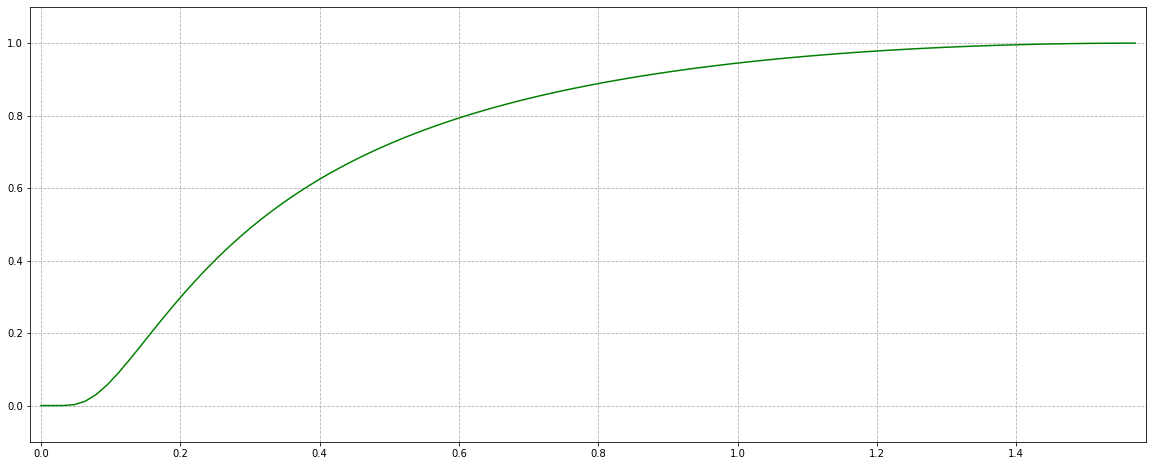

(2.0, 2.220446049250313e-14)


In [83]:
#Solar irradiance
def irr(alt):
    a = np.log(1.35)
    alt = np.maximum(alt,math.pi/180/60)
    return 1.35*np.exp(-a/np.sin(alt))

fig = plt.figure(figsize=(20,8))
ax = fig.gca()

z = np.linspace(0, math.pi/2, 100)

plt.plot(z,irr(z),'g')

plt.margins(.01,.1)
#ax.set_xlim([t1,t2])
#ax.set_ylim([-1,ym])
#ax.set_xticks(np.arange(-xm, xm+.1, 10))
#ax.set_yticks(np.arange(0, ym+.1, 10))
plt.rcParams['grid.linestyle'] = "--"
#ax.set_aspect(1)
plt.grid()
#plt.legend(loc=2)
#plt.savefig('azalteqotUKL.pdf',bbox_inches='tight')
plt.show()

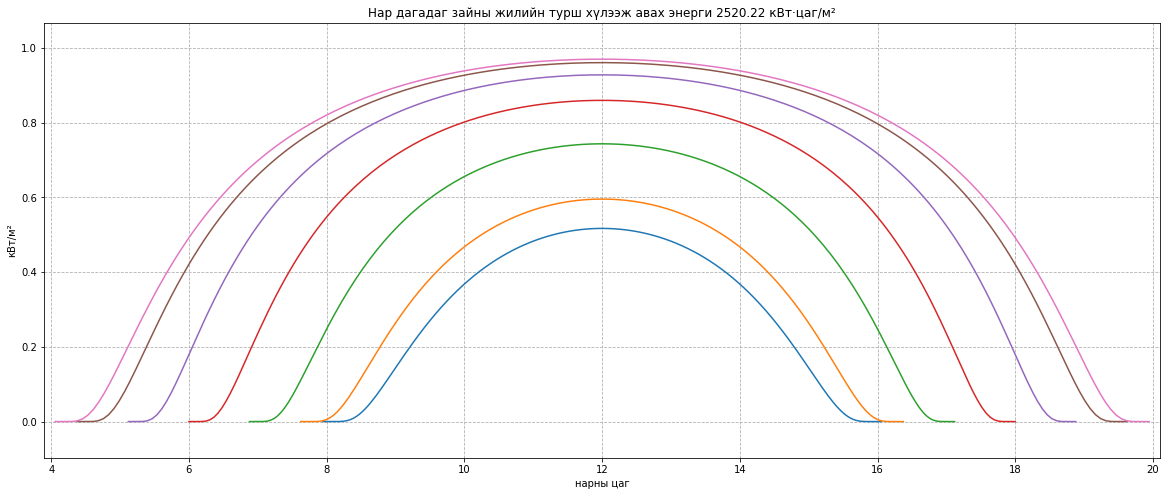

In [190]:
#Solar irradiance calculation: Sun tracking panels
def irr(alt):
    alt = np.maximum(alt,math.pi/180/60)
    return 1.35*np.exp(-np.log(1.35)/np.sin(alt))
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(day):
    d=-sundec(day)
    t=np.arccos(tna*np.tan(d))
    return t
def solalt(tt,dd):
    d=-sundec(dd)
    td=np.tan(d)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return alt
#Perfect sun tracking panel
def irr_perfect(tt,dd):
    alt=solalt(tt,dd)
    return irr(alt)
#Daily insolation
def diurnal_perfect(d):
    r = np.zeros(d.size)
    j = 0
    for i in d:
        sr = setrise(i)
        ta = a2h(-sr)
        tb = a2h(sr)
        r[j] = integrate.quad(lambda t:irr_perfect(t,i),ta,tb)[0]
        j += 1
    return r

xm = 130
ym = 72
t1=5
t2=20

#Ulaagchiin Khar Lake
lat = 48.3463
lon = 96.1212
timezone = 8
dst = 0

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(20,8))
ax = fig.gca()

for i in range(-3,4):
    ddd = i*365.24/12
    sr = setrise(ddd)
    t = np.linspace(a2h(-sr), a2h(sr), 200)
    plt.plot(t,(lambda t:irr_perfect(t,ddd))(t))
    
tir = 0
n = 12
for i in range(n):
    ddd = i*365.24/n
    sr = setrise(ddd)
    ta = a2h(-sr)
    tb = a2h(sr)
    tir = tir + integrate.quad(lambda t:irr_perfect(t,ddd),ta,tb)[0]
tir = tir*365.24/n

plt.margins(.01,.1)
#ax.set_xlim([t1,t2])
#ax.set_ylim([-1,ym])
#ax.set_xticks(np.arange(-xm, xm+.1, 10))
#ax.set_yticks(np.arange(0, ym+.1, 10))
ax.set_title('Нар дагадаг зайны жилийн турш хүлээж авах энерги {0:.2f} кВт·цаг/м²'.format(tir))
ax.set_xlabel('нарны цаг')
ax.set_ylabel('кВт/м²')
#ax.set_aspect(1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('solar_perfect.pdf',bbox_inches='tight')
plt.show()

#fig = plt.figure(figsize=(20,8))
#ax = fig.gca()
#d = np.linspace(0,365,100)    
#plt.plot(d,diurnal_perfect(d),'g')

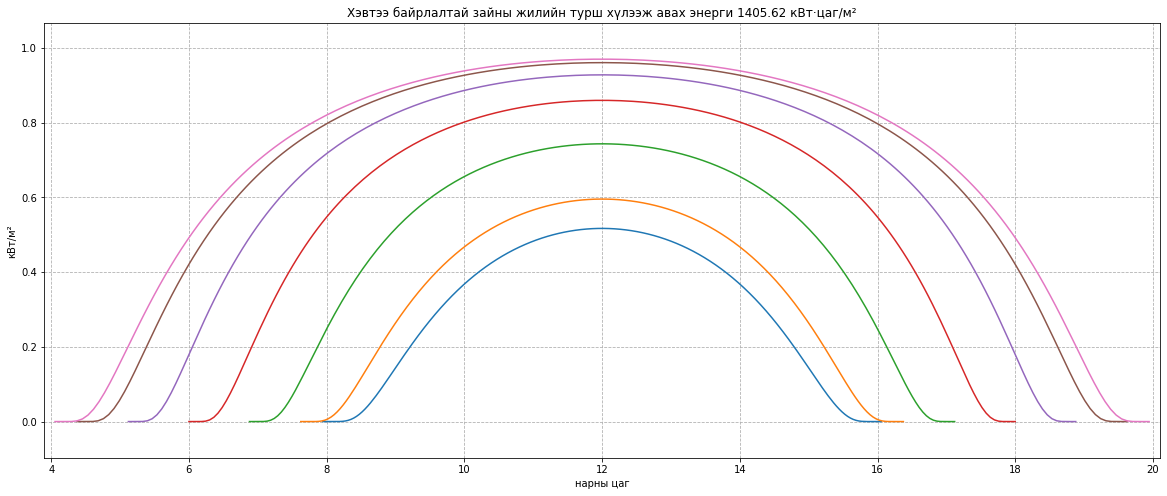

In [191]:
#Solar irradiance calculation: Horizontal panels
def irr(alt):
    alt = np.maximum(alt,math.pi/180/60)
    return 1.35*np.exp(-np.log(1.35)/np.sin(alt))
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(day):
    d=-sundec(day)
    t=np.arccos(tna*np.tan(d))
    return t
def solalt(tt,dd):
    d=-sundec(dd)
    td=np.tan(d)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return alt
#Perfect sun tracking panel
def irr_perfect(tt,dd):
    alt=solalt(tt,dd)
    return irr(alt)
#Horizontal panel
def irr_horiz(tt,dd):
    alt=solalt(tt,dd)
    return irr(alt)*np.sin(alt)
#Daily insolation
def diurnal_horiz(d):
    r = np.zeros(d.size)
    j = 0
    for i in d:
        sr = setrise(i)
        ta = a2h(-sr)
        tb = a2h(sr)
        r[j] = integrate.quad(lambda t:irr_horiz(t,i),ta,tb)[0]
        j += 1
    return r

xm = 130
ym = 72
t1=5
t2=20

#Ulaagchiin Khar Lake
lat = 48.3463
lon = 96.1212
timezone = 8
dst = 0

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(20,8))
ax = fig.gca()

for i in range(-3,4):
    ddd = i*365.24/12
    sr = setrise(ddd)
    t = np.linspace(a2h(-sr), a2h(sr), 200)
    plt.plot(t,(lambda t:irr_perfect(t,ddd))(t))

tir = 0
n = 20
for i in range(n):
    ddd = i*365.24/n
    sr = setrise(ddd)
    ta = a2h(-sr)
    tb = a2h(sr)
    tir = tir + integrate.quad(lambda t:irr_horiz(t,ddd),ta,tb)[0]
tir = tir*365.24/n

plt.margins(.01,.1)
#ax.set_xlim([t1,t2])
#ax.set_ylim([-1,ym])
#ax.set_xticks(np.arange(-xm, xm+.1, 10))
#ax.set_yticks(np.arange(0, ym+.1, 10))
ax.set_title('Хэвтээ байрлалтай зайны жилийн турш хүлээж авах энерги {0:.2f} кВт·цаг/м²'.format(tir))
ax.set_xlabel('нарны цаг')
ax.set_ylabel('кВт/м²')
#ax.set_aspect(1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('solar_horiz.pdf',bbox_inches='tight')
plt.show()

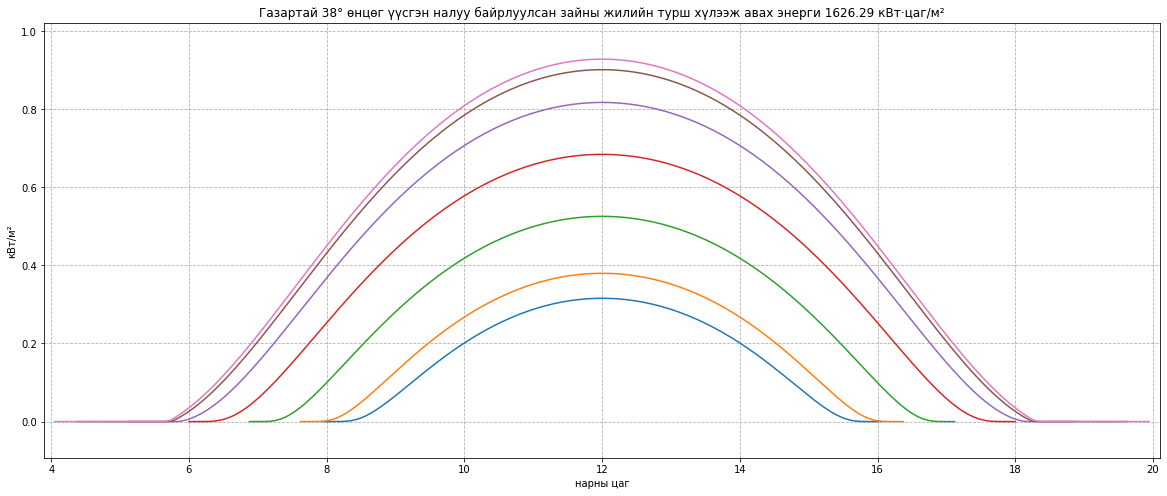

In [192]:
#Solar irradiance calculation: South facing inclined panels
def irr(alt):
    alt = np.maximum(alt,math.pi/180/60)
    return 1.35*np.exp(-np.log(1.35)/np.sin(alt))
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(day):
    d=-sundec(day)
    t=np.arccos(tna*np.tan(d))
    return t
def solalt(tt,dd):
    d=-sundec(dd)
    td=np.tan(d)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return alt
#Perfect sun tracking panel
def irr_perfect(tt,dd):
    alt=solalt(tt,dd)
    return irr(alt)
#Horizontal panel
def irr_horiz(tt,dd):
    alt=solalt(tt,dd)
    return irr(alt)*np.sin(alt)
#South facing panel with inclination angle ah
def irr_south(tt,dd,ah):
    d=-sundec(dd)
    td=np.tan(d)
    lah=lat-ah
    snah=np.sin(lah*math.pi/180)
    csah=np.cos(lah*math.pi/180)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csah*td
    rel_alt=np.arctan2(csah*np.cos(t)-snah*td,np.sqrt(xx*xx+vv*vv))
    alt=solalt(tt,dd)
    return np.maximum(irr(alt)*np.sin(rel_alt),0)
#Daily insolation
def diurnal_ins(d,ah):
    r = np.zeros(d.size)
    j = 0
    for i in d:
        sr = setrise(i)
        ta = a2h(-sr)
        tb = a2h(sr)
        r[j] = integrate.quad(lambda t:irr_south(t,i,ah),ta,tb)[0]
        j += 1
    return r

xm = 130
ym = 72
t1=5
t2=20

#Ulaagchiin Khar Lake
lat = 48.3463
lon = 96.1212
timezone = 8
dst = 0

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(20,8))
ax = fig.gca()

ah = 38

for i in range(-3,4):
    ddd = i*365.24/12
    sr = setrise(ddd)
    t = np.linspace(a2h(-sr), a2h(sr), 200)
    plt.plot(t,(lambda tt:irr_south(tt,ddd,ah))(t))

tir = 0
n = 12
for i in range(n):
    ddd = i*365.24/n
    sr = setrise(ddd)
    ta = a2h(-sr)
    tb = a2h(sr)
    tir = tir + integrate.quad(lambda tt:irr_south(tt,ddd,ah),ta,tb)[0]
tir = tir*365.24/n

plt.margins(.01,.1)
#ax.set_xlim([t1,t2])
#ax.set_ylim([-1,ym])
#ax.set_xticks(np.arange(-xm, xm+.1, 10))
#ax.set_yticks(np.arange(0, ym+.1, 10))
ax.set_title('Газартай {0}° өнцөг үүсгэн налуу байрлуулсан зайны жилийн турш хүлээж авах энерги {1:.2f} кВт·цаг/м²'.format(ah,tir))
ax.set_xlabel('нарны цаг')
ax.set_ylabel('кВт/м²')
#ax.set_aspect(1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('solar38.pdf',bbox_inches='tight')
plt.show()

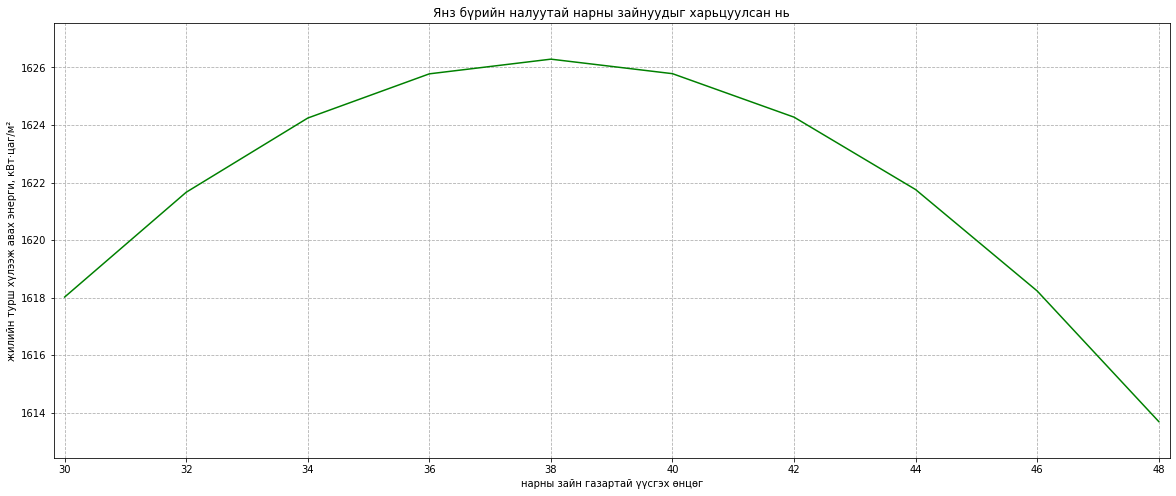

In [198]:
#Solar irradiance calculation: South facing inclined panels
def irr(alt):
    alt = np.maximum(alt,math.pi/180/60)
    return 1.35*np.exp(-np.log(1.35)/np.sin(alt))
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(day):
    d=-sundec(day)
    t=np.arccos(tna*np.tan(d))
    return t
def solalt(tt,dd):
    d=-sundec(dd)
    td=np.tan(d)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return alt
#Perfect sun tracking panel
def irr_perfect(tt,dd):
    alt=solalt(tt,dd)
    return irr(alt)
#Horizontal panel
def irr_horiz(tt,dd):
    alt=solalt(tt,dd)
    return irr(alt)*np.sin(alt)
#South facing panel with inclination angle ah
def irr_south(tt,dd,ah):
    d=-sundec(dd)
    td=np.tan(d)
    lah=lat-ah
    snah=np.sin(lah*math.pi/180)
    csah=np.cos(lah*math.pi/180)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csah*td
    rel_alt=np.arctan2(csah*np.cos(t)-snah*td,np.sqrt(xx*xx+vv*vv))
    alt=solalt(tt,dd)
    return np.maximum(irr(alt)*np.sin(rel_alt),0)
#Daily insolation
def diurnal_ins(d,ah):
    r = np.zeros(d.size)
    j = 0
    for i in d:
        sr = setrise(i)
        ta = a2h(-sr)
        tb = a2h(sr)
        r[j] = integrate.quad(lambda t:irr_south(t,i,ah),ta,tb)[0]
        j += 1
    return r
#Total insolation
def tot_ins(ah):
    r = np.zeros(ah.size)
    n = 12
    for j in range(ah.size):
        tir = 0
        for i in range(n):
            ddd = i*365.24/n
            sr = setrise(ddd)
            ta = a2h(-sr)
            tb = a2h(sr)
            tir = tir + integrate.quad(lambda tt:irr_south(tt,ddd,ah[j]),ta,tb)[0]
        tir = tir*365.24/n
        r[j] = tir
    return r

xm = 130
ym = 72
t1=5
t2=20

#Ulaagchiin Khar Lake
lat = 48.3463
lon = 96.1212
timezone = 8
dst = 0

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(20,8))
ax = fig.gca()

a = np.array(range(30,50,2))
plt.plot(a,tot_ins(a),'g')

plt.margins(.01,.1)
#ax.set_xlim([t1,t2])
#ax.set_ylim([-1,ym])
ax.set_xticks(np.arange(30, 48.1, 2))
#ax.set_yticks(np.arange(0, ym+.1, 10))
ax.set_title('Янз бүрийн налуутай нарны зайнуудыг харьцуулсан нь')
ax.set_xlabel('нарны зайн газартай үүсгэх өнцөг, градусаар')
ax.set_ylabel('жилийн турш хүлээж авах энерги, кВт·цаг/м²')
#ax.set_aspect(1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.legend(loc=2)
#plt.savefig('solar_inc.pdf',bbox_inches='tight')
plt.show()

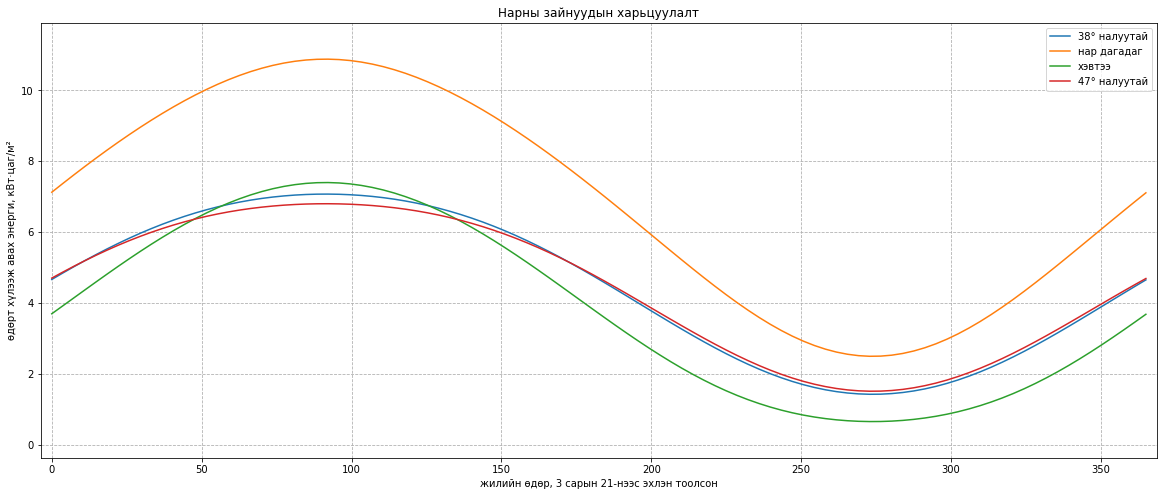

In [210]:
#Solar irradiance calculation: South facing inclined panels
def irr(alt):
    alt = np.maximum(alt,math.pi/180/60)
    return 1.35*np.exp(-np.log(1.35)/np.sin(alt))
def h2a(h):
    return (h-12)*math.pi/12
def a2h(a):
    return 12+a*12/math.pi
def setrise(day):
    d=-sundec(day)
    t=np.arccos(tna*np.tan(d))
    return t
def solalt(tt,dd):
    d=-sundec(dd)
    td=np.tan(d)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csa*td
    alt=np.arctan2(csa*np.cos(t)-sna*td,np.sqrt(xx*xx+vv*vv))
    return alt
#Perfect sun tracking panel
def irr_perfect(tt,dd):
    alt=solalt(tt,dd)
    return irr(alt)
#Horizontal panel
def irr_horiz(tt,dd):
    alt=solalt(tt,dd)
    return irr(alt)*np.sin(alt)
#South facing panel with inclination angle ah
def irr_south(tt,dd,ah):
    d=-sundec(dd)
    td=np.tan(d)
    lah=lat-ah
    snah=np.sin(lah*math.pi/180)
    csah=np.cos(lah*math.pi/180)
    t=h2a(tt)
    xx=np.sin(t)
    vv=sna*np.cos(t)+csah*td
    rel_alt=np.arctan2(csah*np.cos(t)-snah*td,np.sqrt(xx*xx+vv*vv))
    alt=solalt(tt,dd)
    return np.maximum(irr(alt)*np.sin(rel_alt),0)
#Daily insolation
def diurnal_ins(d,ah):
    r = np.zeros(d.size)
    j = 0
    for i in d:
        sr = setrise(i)
        ta = a2h(-sr)
        tb = a2h(sr)
        r[j] = integrate.quad(lambda t:irr_south(t,i,ah),ta,tb)[0]
        j += 1
    return r
#Total insolation
def tot_ins(ah):
    r = np.zeros(ah.size)
    n = 12
    for j in range(ah.size):
        tir = 0
        for i in range(n):
            ddd = i*365.24/n
            sr = setrise(ddd)
            ta = a2h(-sr)
            tb = a2h(sr)
            tir = tir + integrate.quad(lambda tt:irr_south(tt,ddd,ah[j]),ta,tb)[0]
        tir = tir*365.24/n
        r[j] = tir
    return r

xm = 130
ym = 72
t1=5
t2=20

#Ulaagchiin Khar Lake
lat = 48.3463
lon = 96.1212
timezone = 8
dst = 0

sna=np.sin(lat*math.pi/180)
csa=np.cos(lat*math.pi/180)
tna=np.tan(lat*math.pi/180)

fig = plt.figure(figsize=(20,8))
ax = fig.gca()

plt.plot(d,(lambda d:diurnal_ins(d,38))(d),label="38° налуутай")
plt.plot(d,(lambda d:diurnal_perfect(d))(d),label="нар дагадаг")
plt.plot(d,(lambda d:diurnal_horiz(d))(d),label="хэвтээ")
plt.plot(d,(lambda d:diurnal_ins(d,47))(d),label="47° налуутай")

plt.margins(.01,.1)
#ax.set_xlim([t1,t2])
#ax.set_ylim([-1,ym])
#ax.set_xticks(np.arange(-xm, xm+.1, 10))
#ax.set_yticks(np.arange(0, ym+.1, 10))
ax.set_title('Нарны зайнуудын харьцуулалт')
ax.set_xlabel('жилийн өдөр, 3 сарын 21-нээс эхлэн тоолсон')
ax.set_ylabel('өдөрт хүлээж авах энерги, кВт·цаг/м²')
#ax.set_aspect(1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend(loc=1)
#plt.savefig('solar_comp.pdf',bbox_inches='tight')
plt.show()